## Capstone Project 1 - Data Storytelling 

#### The Main Question: Is there a relationship between audio features of songs and their popularity in the dataset in hand?

After going through a data wrangling/cleaning step, which was presented in the previous ipython notebook, in this notebook I attempt to answer the question above using visualizations only (i.e. without sophisticated statistical analyses). I will also look into the visualizations created to see if there are any other interesting patterns I did not expect.   

To review the definitions of variables, please see the previous ipython notebook on GitHub:
https://github.com/hamidniki/Capstone-project1/blob/master/Capstone%201%20Data%20Wrangling.ipynb

In [3]:
## Import the relevant modules
import numpy as np
import pandas as pd
from pandas.tools.plotting import scatter_matrix
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
## Read in the wrangled data from a CSV file
filename = 'SpotifyAudioFeaturesNov2018_wrangled.csv'
data=pd.read_csv(filename)
data.head()

,Unnamed: 0,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
0,0,YG,2RM4jf1Xa9zPgMGRDiht8O,"Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj",0.005820,0.743,238373,0.339,0.000,1,0.0812,-7.678,1,0.4090,203.927,4,0.118,44
1,1,YG,1tHDG53xJNGsItRA3vfVgs,BAND DRUM (feat. A$AP Rocky),0.024400,0.846,214800,0.557,0.000,8,0.2860,-7.259,1,0.4570,159.009,4,0.371,10
2,2,R3HAB,6Wosx2euFPMT14UXiWudMy,Radio Silence,0.025000,0.603,138913,0.723,0.000,9,0.0824,-5.890,0,0.0454,114.966,4,0.382,63
3,3,Chris Cooq,3J2Jpw61sO7l6Hc7qdYV91,Lactose,0.029400,0.800,125381,0.579,0.912,5,0.0994,-12.118,0,0.0701,123.003,4,0.641,9
4,4,Chris Cooq,2jbYvQCyPgX3CdmAzeVeuS,Same - Original mix,0.000035,0.783,124016,0.792,0.878,7,0.0332,-10.277,1,0.0661,120.047,4,0.928,8


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116372 entries, 0 to 116371
Data columns (total 18 columns):
Unnamed: 0          116372 non-null int64
artist_name         116372 non-null object
track_id            116372 non-null object
track_name          116372 non-null object
acousticness        116372 non-null float64
danceability        116372 non-null float64
duration_ms         116372 non-null int64
energy              116372 non-null float64
instrumentalness    116372 non-null float64
key                 116372 non-null int64
liveness            116372 non-null float64
loudness            116372 non-null float64
mode                116372 non-null int64
speechiness         116372 non-null float64
tempo               116372 non-null float64
time_signature      116372 non-null int64
valence             116372 non-null float64
popularity          116372 non-null int64
dtypes: float64(9), int64(6), object(3)
memory usage: 16.9+ MB


Looking at the correlation plot of all numeric variables to see if we visually notice any correlation:

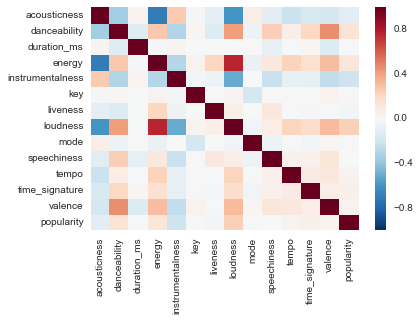

In [28]:
corr = data.corr().iloc[1:,1:]
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

#### Observations From The Correlation Plot:

- Looking at the bottom row, popularity has the highest correlation with loudness. This is not surprising because louder musics with higher energy tend to be more danceable and played often at bars/parties
- Adding to the point above, in the plot we see loudness is highly correlated with energy and has, less but still noticeable, correlation with danceability and valence (how happy the music is), which are all elements that make a song more suitable for parties 
- Valence and danceability are positively correlated and that is because happier songs tend to be more danceable 
- Popularity also seems to be negatively correlated with instrumentalness(absence of vocal in the track). This indicates listeners are more inclined toward tracks that contain vocal. This makes sense as well because some people are less inclined by the music itslef and it is the lyrics that draws them to the music. So music tracks with vocal elements are at an advantage.
- Tempo has noticeable positive correlation with energy and loudness
- Speechiness and instrumentalness are negatively correlated which makes sense given the definition of these two variables
- Loudness and energy are highly negatively correlated with acousticness. This is because musics produced using acoustic instruments tend to be softer than electronic music. 

#### Producing and Examining The Scatter Matrix of Numeric Variables:

In [22]:
## Creating a new dataframe which only contains the numeric variables
data_num = data.drop(['artist_name','track_name','track_id','mode','key','time_signature'],axis=1)

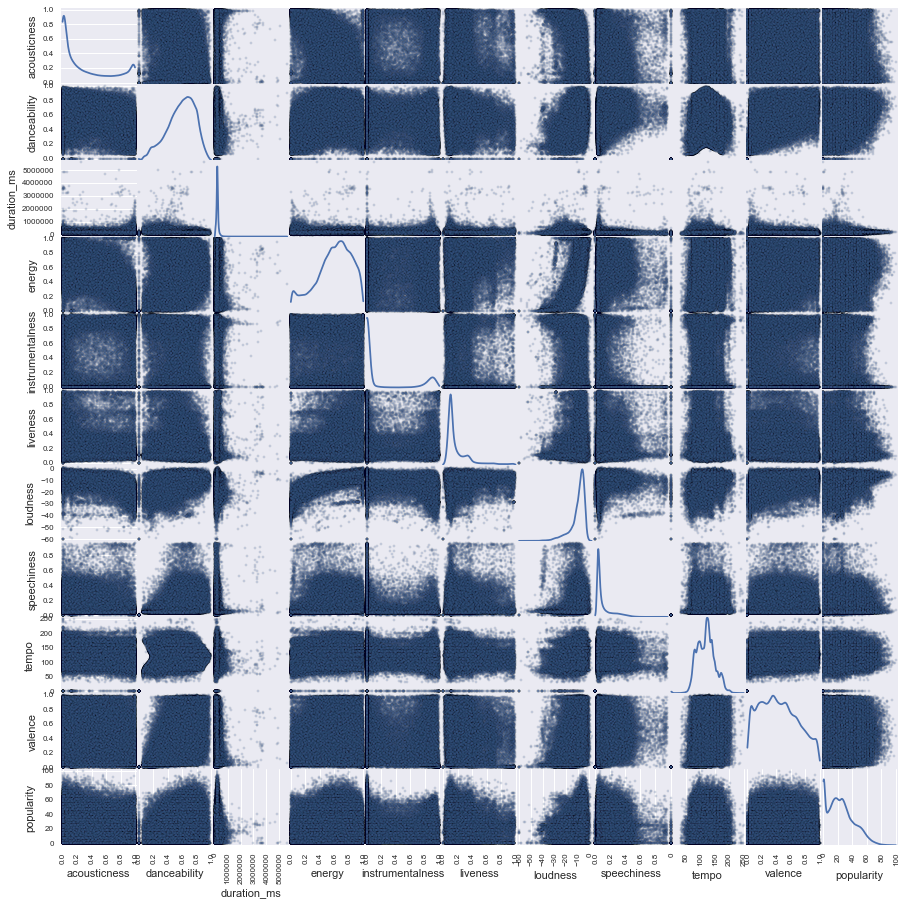

In [25]:
scatter_matrix(data_num.iloc[1:,1:], alpha = 0.2, figsize = (15, 15), diagonal = 'kde')
plt.show()

#### Observations From The Scatter Matrix:

- Much of what we observed in correlation matrix can be seen here too as these two kinds of plots convey the same information
- Tracks with very long length (e.g. 80 or 90 minutes) tend to be mostly soft and instrumental and used less for dancing. 
- Live tracks are less popular in spotify. This is because, eventhough listening to live music as it is being played is entertaining, because of the lower quality of sound, the recorded versions of live performances are not popular for listening in car or playing at home/parties
- Tracks with extreme tempo levels (< 50 BPM or > 250 BMP) are not popular

### Visual Inspection of Categorical Variables (Mode, Key, Time_signature):

Variables mode, key and time_signature are represented as integer variables in the dataset. However, since these variables do not have ordinal nature, we will use them as categorical variables in future analyses. Below we examine their relationship with popularity using boxplots. The interpretation of the values in these variables are as follows:

- ** Mode:** 0 = Minor, 1= Major
- ** Key:** 0 = C, 1 = Db, 2 = D, 3 = Eb, 4 = E, 5 = F, 6 = Gb, 7 = G, 8 = Ab, 9 = A, 10 = Bb, 11 = B
- ** Time_signature:** Number of beats in each measure. There is no order associated with, say, a 4-beat rhythm or a 5-beat rhythm. They are very different rhythmic feels. 


** Mode: ** There is no visible difference between minor vs major modes in terms of popularity.

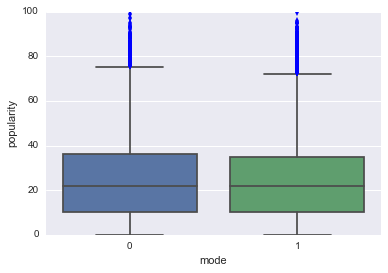

In [24]:
sns.boxplot(x="mode", y="popularity", data=data, order=[0,1])
plt.show()

**Key:** There is no visible difference between different keys in terms of popularity.

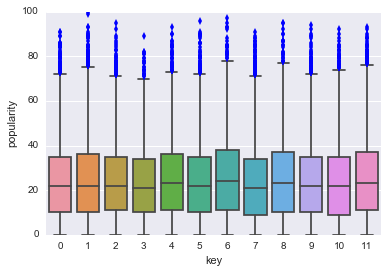

In [16]:
sns.boxplot(x="key", y="popularity", data=data, order=[0,1,2,3,4,5,6,7,8,9,10,11])
plt.show()

** Time Signature: ** Rhythms with 4 beats per measure seem to be more popular. This could be due to the following facts:

- 4-beat music is more common than any other kind of rhythm. This is the most familiar beat to human ear and, as seen in the frequency count below the chart, it is the most frequent time_signature in the dataset (~ 86%) 
- 4-beat music is commonly used in popular genres of music which have fast tempos, high energy and are danceable.

Notice there are no 2-beat tracks in the dataset. This rhythm is not as common as other rhythms, but it exists. This might be because tracks with 2-beat rhythm are categorized as having had 3-beat rhythm, due to the similarity of these two kinds of rhythms (i.e. 2/4 signature vs 3/6 signature)

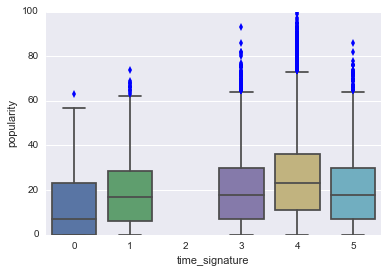

In [20]:
sns.boxplot(x="time_signature", y="popularity", data=data, order=[0,1,2,3,4,5])
plt.show()

4-beat rhythm is the most frequent time signature in the dataset:

In [33]:
data.time_signature.value_counts().sort_index()

0       261
1      1506
3     11007
4    100644
5      2954
Name: time_signature, dtype: int64

#### Checking for Interactions Between Numerical Variables and Levels of Time Signature:

Below we generate the correlation plot for some levels of time signature to see if we detect a different behavior from any of the numerical variables at certain levels of time signature. No obvious interaction was detected. 

** 5-beat rhthms: **

In [50]:
data_temp = data.loc[data['time_signature'] == 5]
data_temp.shape

(2954, 18)

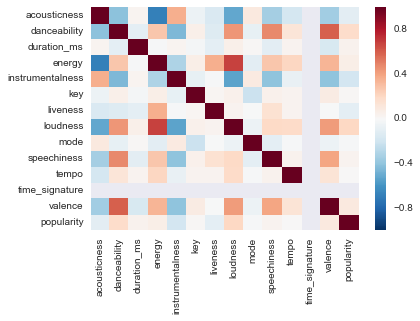

In [46]:
corr_temp = data_temp.corr().iloc[1:,1:]
sns.heatmap(corr_temp, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

** 4-beat rhythms: **

In [52]:
data_temp = data.loc[data['time_signature'] == 4]
data_temp.shape

(100644, 18)

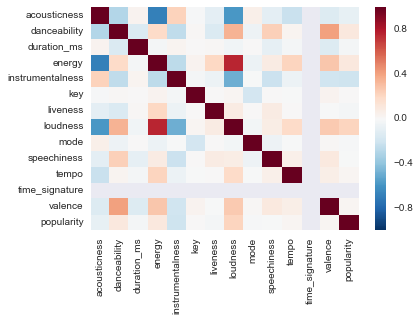

In [53]:
corr_temp = data_temp.corr().iloc[1:,1:]
sns.heatmap(corr_temp, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

** 3-beat rhythms: **

In [54]:
data_temp = data.loc[data['time_signature'] == 3]
data_temp.shape

(11007, 18)

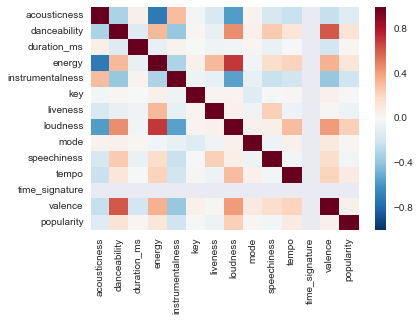

In [55]:
corr_temp = data_temp.corr().iloc[1:,1:]
sns.heatmap(corr_temp, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

### Conclusion:

From the above visual inspections it is apparent that loudness, energy, danceability and time_signature have the strongest positive correlations and acousticness and instrumentalness have a weak negative correlation with popularity. This hypothesis, however, needs to be formally tested using formal statistical analyses in future phases of the project. We visually inspected the interaction between time signature and the numerical variables and we did not detect any interaction. There could, however, be interaction between other variables which we did not check for. We will dig deeper into the data using statistical analyses in later phases of the project.